# io module examples

In this module we demonstrate Pymagicc's io capabilities.

In [26]:
# NBVAL_IGNORE_OUTPUT
from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError

import expectexception

In [27]:
import matplotlib.pyplot as plt
plt.style.use('bmh') 
%matplotlib inline

In [28]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")
TEST_DATA_DIR = join("..", "tests", "test_data")

## Read files

`MAGICCData` is the key object in Pymagicc's io module. This object allows us to easily read/write MAGICC input files. Its `__init__` docstring explains how a `MAGICCData` instance can be initialised.

In [29]:
print(MAGICCData.__init__.__doc__)


        Initialise a MAGICCData instance

        Here we provide a brief over of inputs, for more details
        see ``openscm.ScmDataFrameBase``.

        Parameters
        ----------
        data: pd.DataFrame, pd.Series, np.ndarray or string
            A pd.DataFrame or data file, or a numpy array of timeseries data if `columns` is specified.
            If a string is passed, data will be attempted to be read from file.

        columns: dict
            Dictionary to use to write the metadata for each timeseries in data. MAGICCData will
            also attempt to infer values from data. Any values in columns will be used in
            preference to any values found in data. The default value for "model", "scenario"
            and "climate_model" is "unspecified". See ``openscm.ScmDataFrameBase`` for details.

        kwargs:
            Additional parameters passed to `pyam.core.read_files` to read non-standard files.
        


Here we load a file from disk and tell MAGICCData to set the scenario column to "Historical".

In [30]:
# NBVAL_IGNORE_OUTPUT
mdata = MAGICCData(
    join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"),
    columns={"scenario": ["Historical"]},
)
mdata.head()

time                                                                                                         1765-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1766-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1767-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1768-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1769-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fos

Any metadata which is found in the file is included in `MAGICCData`'s `metadata` attribute.

In [31]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE\r\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37',
 'source': 'RCP data as presented on '
           'http://www.iiasa.ac.at/web-apps/tnt/RcpDb, August 2009'}


## Filtering

As `MAGICCData` subclasses OpenSCM's `ScmDataFrame`, we get access to all of its useful capabilities, for example filtering.

In [32]:
mdata.filter(region="*R5ASIA").head()

,,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,todo,,,,,,,,,,,,,,,,,,,,,
unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,unspecified,SET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.76053,1.648214,1.712315,1.768203,1.849029,1.922234,2.142218,2.417585,2.608225,2.795696


### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [33]:
# NBVAL_IGNORE_OUTPUT
mdata = mdata.append(
    join(MAGICC6_DIR, "RCP45.SCEN"),
    columns={"model": ["MiniCAM"]},
)
mdata.head()

time                                                                                                         1765-01-01 00:00:00  \
model       scenario   region       variable                                   unit      climate_model todo                        
unspecified Historical World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   

time                                                                                                         1766-01-01 00:00:00  \
model       scenario   region       variable                                   unit      climate_model todo                        
unspecified Historical World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   

time                                                                                                         1767-01-01 00:00:00  \
model       scenario   region       variable                                   unit      climate_model todo                        
unspecified Historical World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   

time                                                                                                         1768-01-01 00:00:00  \
model       scenario   region       variable                                   unit      climate_model todo                        
unspecified Historical World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   
                       World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                 0.000   

time                                                                                                         1769-01-01 00:00:00  \
model       scenario   region       variable                                   unit      climate_model todo                        
unspecified Historical World|R5ASIA 

In [34]:
# NBVAL_IGNORE_OUTPUT
mdata.filter(
    variable="*BC",
    region="*ASIA"
).head()

,,,,,,time,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2010-01-01 00:00:00,2020-01-01 00:00:00,...,2250-01-01 00:00:00,2260-01-01 00:00:00,2270-01-01 00:00:00,2280-01-01 00:00:00,2290-01-01 00:00:00,2300-01-01 00:00:00,2350-01-01 00:00:00,2400-01-01 00:00:00,2450-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,todo,,,,,,,,,,,,,,,,,,,,,
unspecified,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,unspecified,SET,3.0468,3.109,3.1818,3.2546,3.3274,3.4002,3.4057,3.4112,3.4279,3.4835,...,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791


### Reading RCP data files

We can also read the RCP data files provided at http://www.pik-potsdam.de/~mmalte/rcps/. These are also tricky as the underlying data format is unique. 

In the cell below we read a file from disk and we set the model column to be "IMAGE", the scenario column to be "RCP26" and the climate_model column to be "MAGICC6".

<div class="alert alert-danger">
  <strong>Danger!</strong> As Pymagicc (and OpenSCM) are closely related to Pyam, we always use the word "model" to refer to integrated assessment model. Information related to climate models should always go in the "climate_model" column.
</div>

In [36]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data = MAGICCData(
    join(TEST_DATA_DIR, "RCP3PD_EMISSIONS.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    }
)
rcp_online_data.head()

time                                                                                              1765-01-01 00:00:00  \
model scenario region variable                                   unit         climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET                 0.003   
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET                 0.000   
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET                 0.000   
                      Emissions|N2O                              Mt N2ON / yr MAGICC6       SET                 0.000   
                      Emissions|SOx                              Mt S / yr    MAGICC6       SET                 0.000   

time                                                                                              1766-01-01 00:00:00  \
model scenario region variable                                   unit         climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET              0.003000   
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET              0.005338   
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET              1.963262   
                      Emissions|N2O                              Mt N2ON / yr MAGICC6       SET              0.005191   
                      Emissions|SOx                              Mt S / yr    MAGICC6       SET              0.098883   

time                                                                                              1767-01-01 00:00:00  \
model scenario region variable                                   unit         climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET              0.003000   
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET              0.010677   
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET              2.436448   
                      Emissions|N2O                              Mt N2ON / yr MAGICC6       SET              0.010117   
                      Emissions|SOx                              Mt S / yr    MAGICC6       SET              0.116306   

time                                                                                              1768-01-01 00:00:00  \
model scenario region variable                                   unit         climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET              0.003000   
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET              0.016015   
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET              2.911105   
                      Emissions|N2O                              Mt N2ON / yr MAGICC6       SET              0.015043   
                      Emissions|SOx                              Mt S / yr    MAGICC6       SET              0.133811   

time                                                                                              1769-01-01 00:00:00  \
model scenario region variable                                   unit         climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    MAGICC6       SET              0.003000   
                      Emissions|CO2|MAGICC AFOLU                 Gt C / yr    MAGICC6       SET              0.021353   
                      Emissions|CH4                              Mt CH4 / yr  MAGICC6       SET              3.387278   
   

In [11]:
rcp_online_data[["variable", "unit"]]

,variable,unit
0,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
1,Emissions|CO2|MAGICC AFOLU,Gt C / yr
2,Emissions|CH4,Mt CH4 / yr
3,Emissions|N2O,Mt N2ON / yr
4,Emissions|SOx,Mt S / yr
5,Emissions|CO,Mt CO / yr
6,Emissions|NMVOC,Mt NMVOC / yr
7,Emissions|NOx,Mt N / yr
8,Emissions|BC,Mt BC / yr
9,Emissions|OC,Mt OC / yr


### Append

We can then append other RCP3PD data, e.g. concentrations, to the same `MAGICCData` instance using its `append` method. 

In [12]:
print(rcp_online_data.append.__doc__)


        Append any input which can be converted to MAGICCData to self.

        Parameters
        ----------
        other : MAGICCData, pd.DataFrame, pd.Series, str
            Source of data to append.

        inplace : bool
            If True, append ``other`` inplace, otherwise return a new ``MAGICCData``
            instance.

        constructor_kwargs : dict
            Passed to ``MAGICCData`` constructor (only used if ``other`` is not a
            ``MAGICCData`` instance).

        **kwargs
            Passed to ``super().append()``
        


In this case we want to append a file from disk and we want the appended file's model column to be "IMAGE", its scenario column to be "RCP26" and its climate_model column to be "MAGICC6".

In [13]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_CONCENTRATIONS.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    },
    inplace=True,
)
rcp_online_data.head()

time                                                                                             1765-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET                 0.000   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET                 0.003   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET                 0.000   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET                 0.000   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET                 0.000   

time                                                                                             1766-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.005338   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.106998   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              1.963262   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET              9.050221   

time                                                                                             1767-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.010677   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.133383   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              2.436448   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET             12.960844   

time                                                                                             1768-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.016015   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.159847   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              2.911105   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET             16.876539   

time                                                                                             1769-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.021353   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.186393   
                      Emissions|CH4 

In [14]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data[["variable", "unit"]]

,variable,unit
0,Emissions|CO2|MAGICC AFOLU,Gt C / yr
1,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
2,Emissions|BC,Mt BC / yr
3,Emissions|CH4,Mt CH4 / yr
4,Emissions|CO,Mt CO / yr
5,Emissions|NH3,Mt N / yr
6,Emissions|NOx,Mt N / yr
7,Emissions|N2O,Mt N2ON / yr
8,Emissions|NMVOC,Mt NMVOC / yr
9,Emissions|OC,Mt OC / yr


We can also append the radiative forcing information.

In [15]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data = rcp_online_data.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_RADFORCING.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    }
)
rcp_online_data.head()

time                                                                                             1765-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET                 0.000   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET                 0.003   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET                 0.000   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET                 0.000   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET                 0.000   

time                                                                                             1766-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.005338   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.106998   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              1.963262   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET              9.050221   

time                                                                                             1767-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.010677   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.133383   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              2.436448   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET             12.960844   

time                                                                                             1768-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.016015   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.159847   
                      Emissions|CH4                              Mt CH4 / yr MAGICC6       SET              2.911105   
                      Emissions|CO                               Mt CO / yr  MAGICC6       SET             16.876539   

time                                                                                             1769-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   MAGICC6       SET              0.021353   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   MAGICC6       SET              0.003000   
                      Emissions|BC                               Mt BC / yr  MAGICC6       SET              0.186393   
                      Emissions|CH4 

In [16]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data[["variable","unit"]]

,variable,unit
0,Emissions|CO2|MAGICC AFOLU,Gt C / yr
1,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
2,Emissions|BC,Mt BC / yr
3,Emissions|CH4,Mt CH4 / yr
4,Emissions|CO,Mt CO / yr
5,Emissions|NH3,Mt N / yr
6,Emissions|NOx,Mt N / yr
7,Emissions|N2O,Mt N2ON / yr
8,Emissions|NMVOC,Mt NMVOC / yr
9,Emissions|OC,Mt OC / yr


Making the most of `MAGICCData`'s data analysis features can allow all sorts of plots to be made with little difficulty.

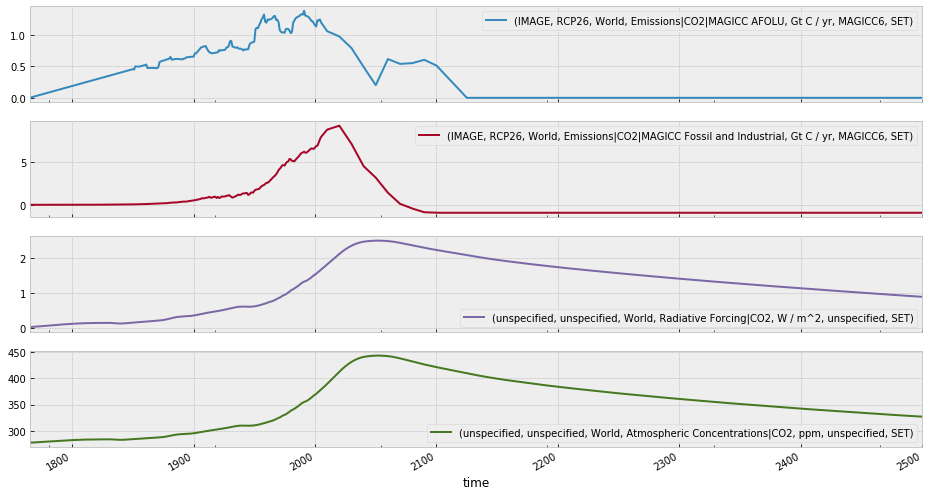

In [17]:
rcp_online_data.filter(
    variable="*CO2*",
    region="World"
).filter(
    variable="*Eq*",
    keep=False
).filter(
    variable="*,*",
    keep=False
).timeseries().T.plot(subplots=True, figsize=(16, 9));

### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [18]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):
    
    if file.endswith((".exe", ".MON")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(
            join(MAGICC6_DIR, file)
        )
    else:   
        all_run_files[file] = MAGICCData(join(MAGICC6_DIR, file))

In [19]:
sorted(all_run_files.keys())

['EDGAR_NOXB_EMIS.IN',
 'EDGAR_NOXI_EMIS.IN',
 'GISS_BCB_OT.IN',
 'GISS_BCB_RF.IN',
 'GISS_BCI_OT.IN',
 'GISS_BCI_RF.IN',
 'GISS_BCSNOW_RF.IN',
 'GISS_LANDUSE_RF.IN',
 'GISS_NOX_RF.IN',
 'GISS_OCB_OT.IN',
 'GISS_OCB_RF.IN',
 'GISS_OCI_OT.IN',
 'GISS_OCI_RF.IN',
 'GISS_OCN_OT.IN',
 'GISS_SOXI_OT.IN',
 'GISS_SOXNB_OT.IN',
 'GISS_SOX_RF.IN',
 'GISS_SS_OT.IN',
 'HISTRCP2009_SOLAR_RF.IN',
 'HISTRCP45SCP45to3PD_SOLAR_RF.IN',
 'HISTRCP45_SOLAR_RF.IN',
 'HISTRCP60_2300_SOLAR_RF.IN',
 'HISTRCP6SCP6to45_SOLAR_RF.IN',
 'HISTRCP6_SOLAR_RF.IN',
 'HISTRCP85_SOLAR_RF.IN',
 'HISTRCP_BCB_EMIS.IN',
 'HISTRCP_BCI_EMIS.IN',
 'HISTRCP_C2F6_CONC.IN',
 'HISTRCP_C2F6_EMIS.IN',
 'HISTRCP_C6F14I_EMIS.IN',
 'HISTRCP_C6F14_CONC.IN',
 'HISTRCP_C6F14_EMIS.IN',
 'HISTRCP_CF4_CONC.IN',
 'HISTRCP_CF4_EMIS.IN',
 'HISTRCP_CH4B_EMIS.IN',
 'HISTRCP_CH4I_EMIS.IN',
 'HISTRCP_CH4_CONC.IN',
 'HISTRCP_CO2B_EMIS.IN',
 'HISTRCP_CO2I_EMIS.IN',
 'HISTRCP_CO2_CONC.IN',
 'HISTRCP_COB_EMIS.IN',
 'HISTRCP_COI_EMIS.IN',
 'HISTRCP_HFC12

In [20]:
all_run_files["SRESB2.SCEN"].head()

time                                                                                                         1990-01-01 00:00:00  \
model       scenario   region    variable                                   unit         climate_model todo                        
unspecified B2_MESSAGE World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                0.7152   
                                 Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.7321   
                                 Emissions|CH4                              Mt CH4 / yr  unspecified   SET               76.7245   
                                 Emissions|N2O                              Mt N2ON / yr unspecified   SET                1.1778   
                                 Emissions|SOx                              Mt S / yr    unspecified   SET               10.5377   

time                                                                                                         2000-01-01 00:00:00  \
model       scenario   region    variable                                   unit         climate_model todo                        
unspecified B2_MESSAGE World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                1.0116   
                                 Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.8169   
                                 Emissions|CH4                              Mt CH4 / yr  unspecified   SET               85.1631   
                                 Emissions|N2O                              Mt N2ON / yr unspecified   SET                1.2938   
                                 Emissions|SOx                              Mt S / yr    unspecified   SET               12.7760   

time                                                                                                         2010-01-01 00:00:00  \
model       scenario   region    variable                                   unit         climate_model todo                        
unspecified B2_MESSAGE World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                1.2639   
                                 Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.6338   
                                 Emissions|CH4                              Mt CH4 / yr  unspecified   SET               94.4740   
                                 Emissions|N2O                              Mt N2ON / yr unspecified   SET                0.6886   
                                 Emissions|SOx                              Mt S / yr    unspecified   SET               14.4000   

time                                                                                                         2020-01-01 00:00:00  \
model       scenario   region    variable                                   unit         climate_model todo                        
unspecified B2_MESSAGE World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                1.4831   
                                 Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.4206   
                                 Emissions|CH4                              Mt CH4 / yr  unspecified   SET              101.6967   
                                 Emissions|N2O                              Mt N2ON / yr unspecified   SET                0.6016   
                                 Emissions|SOx                              Mt S / yr    unspecified   SET               15.2410   

time                                                                                                         2030-01-01 00:00:00  \
model       scenario   region    variable                                   unit         climate_model todo                        
unspecified B2_MESSAGE World|ALM Emi

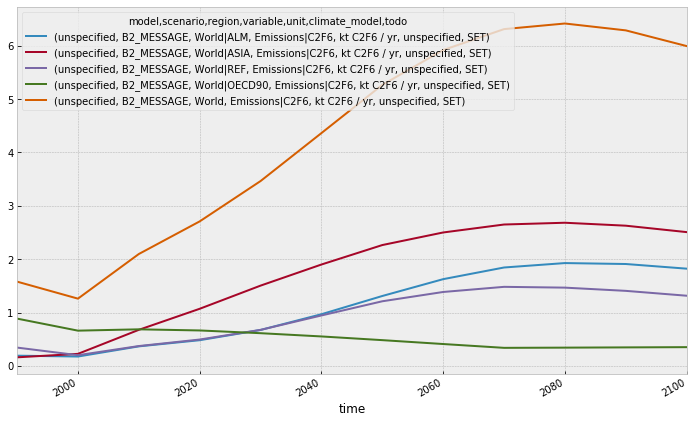

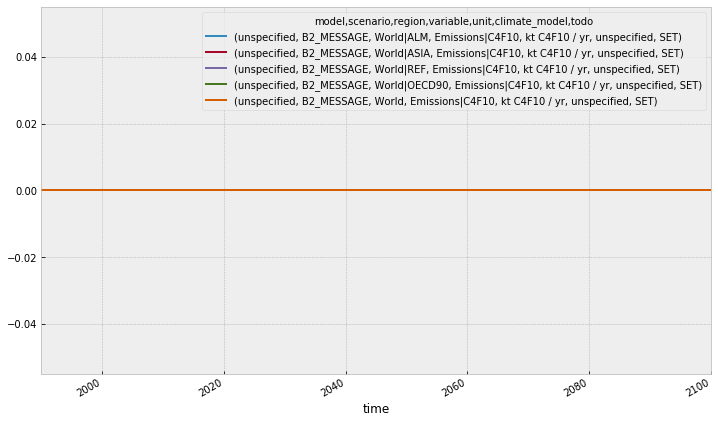

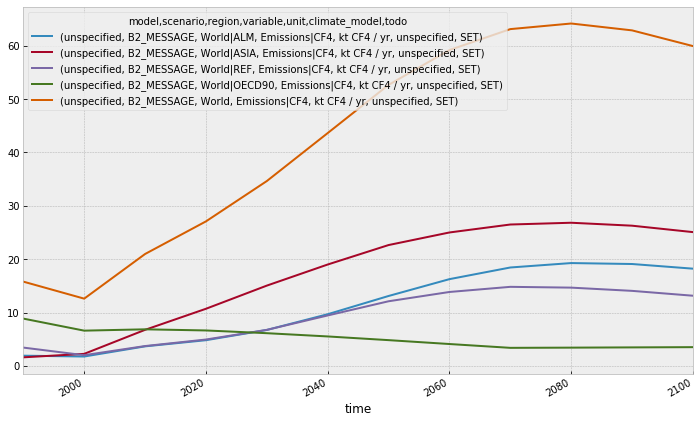

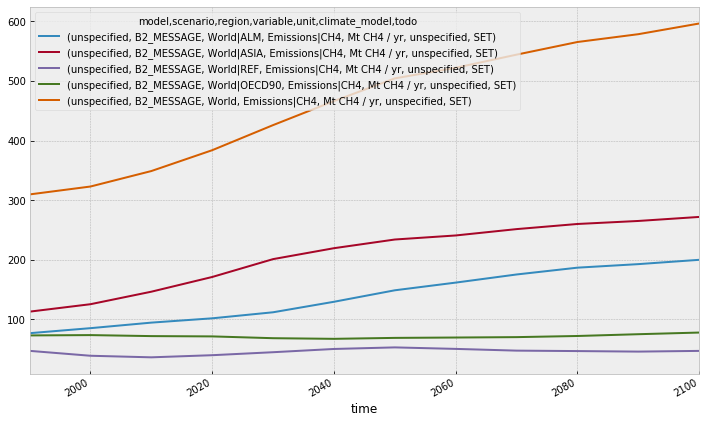

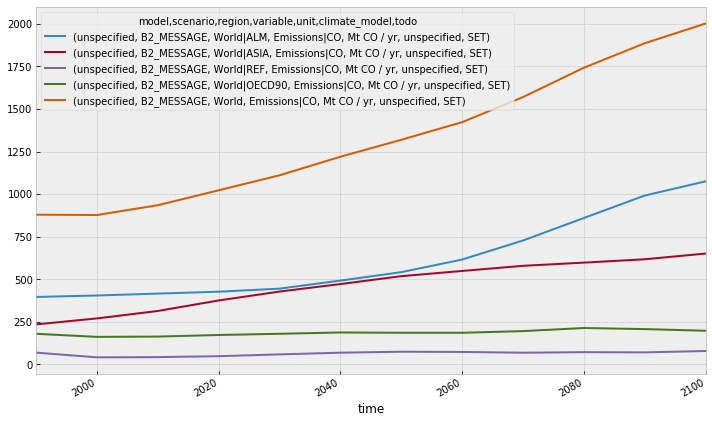

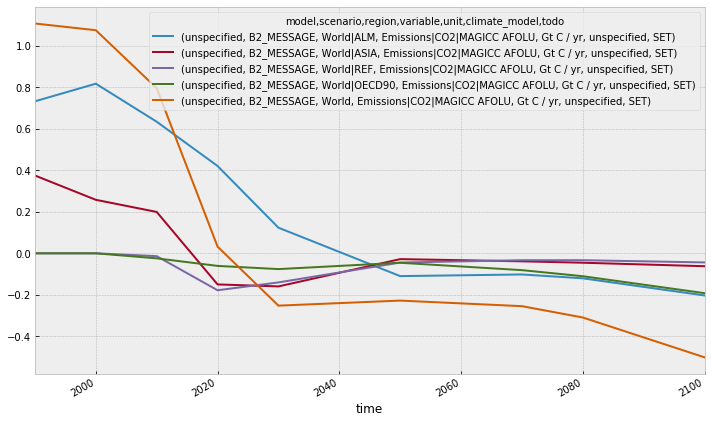

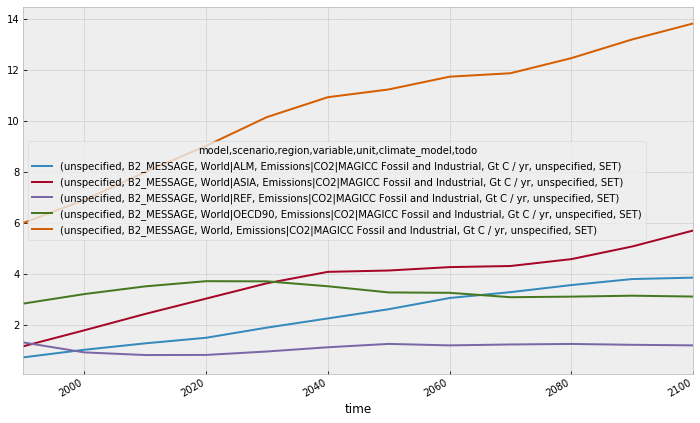

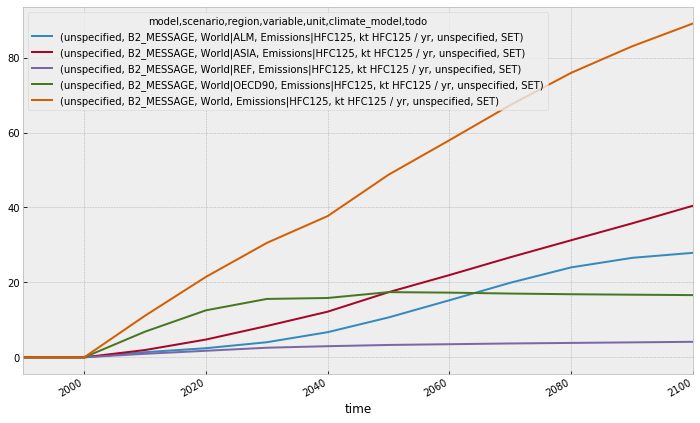

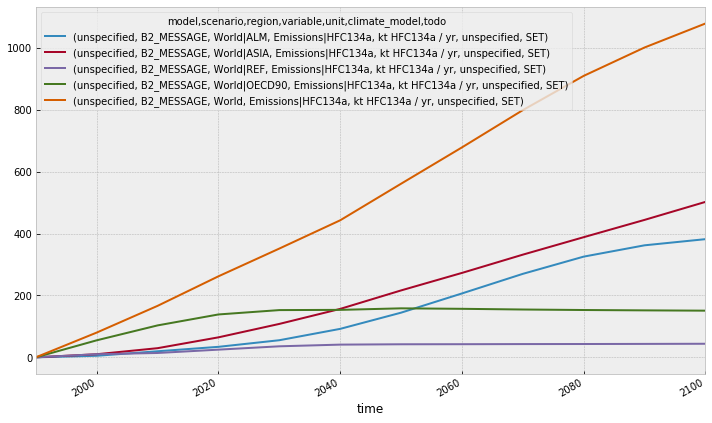

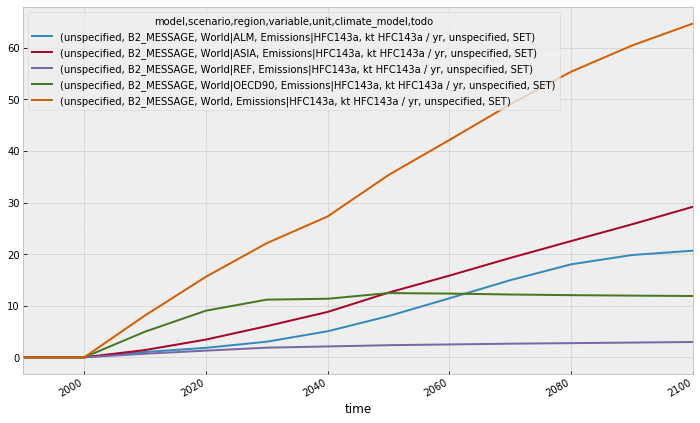

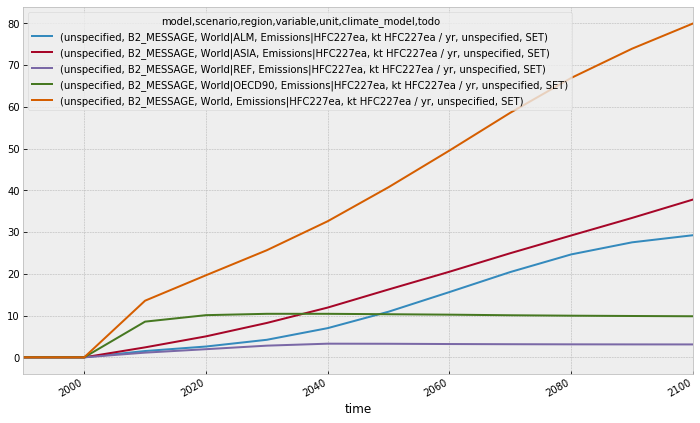

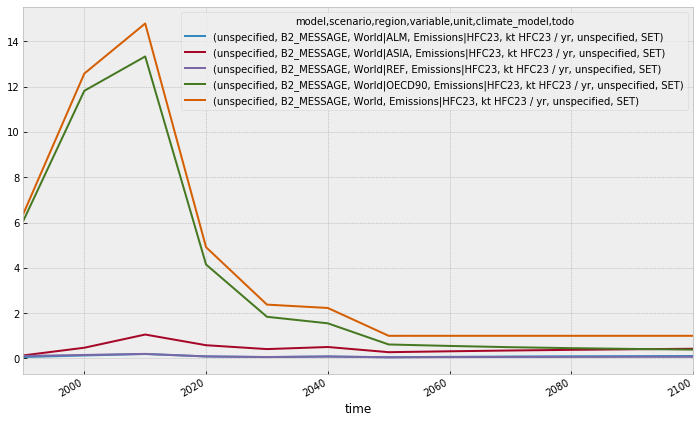

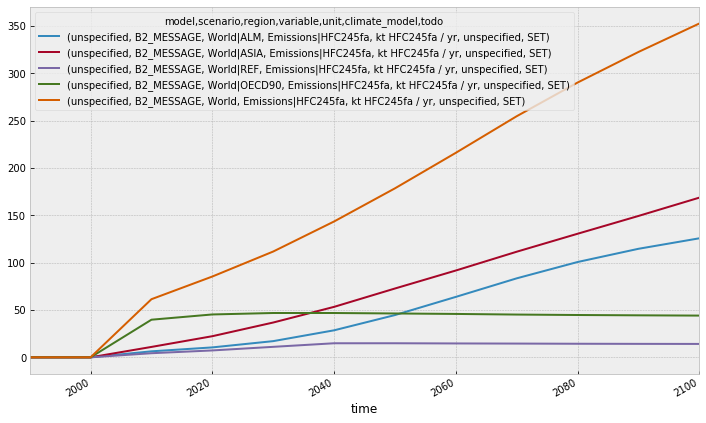

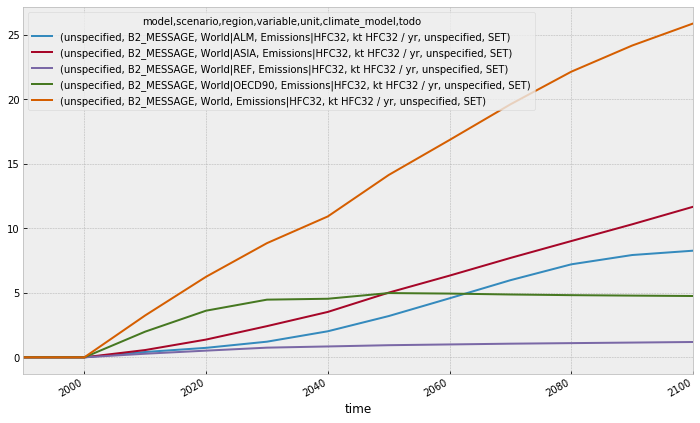

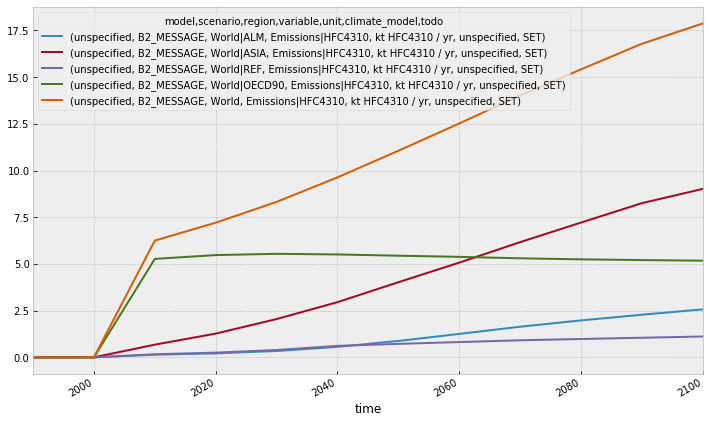

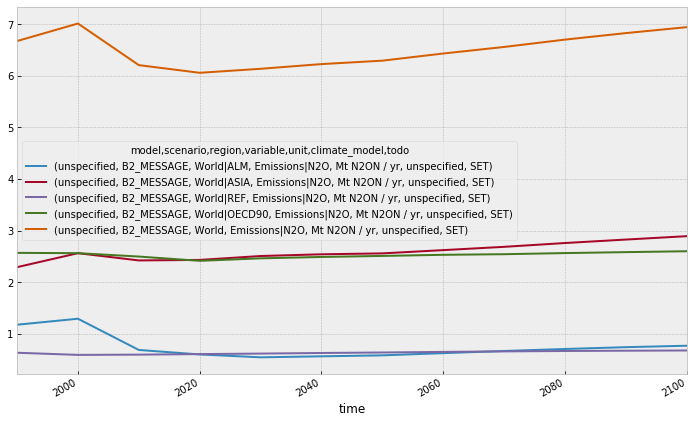

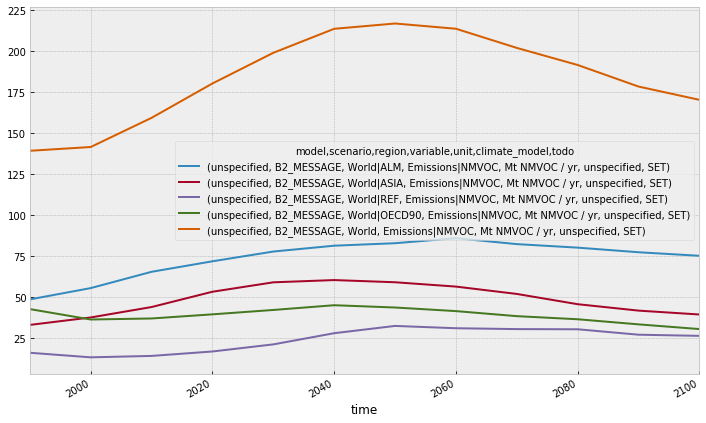

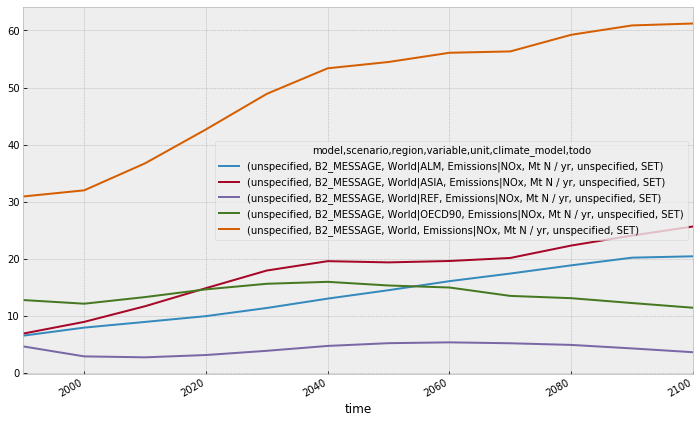

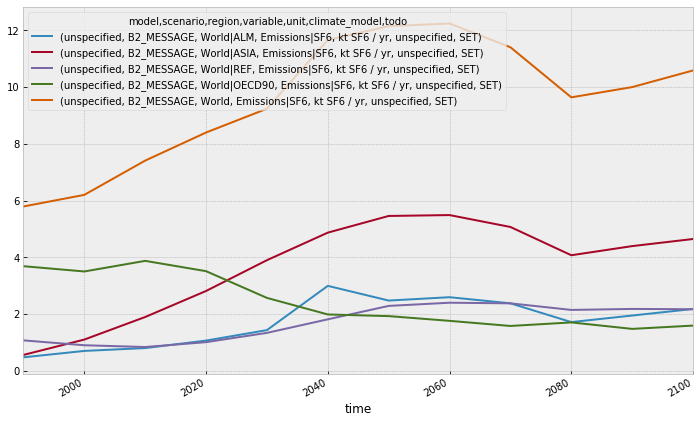

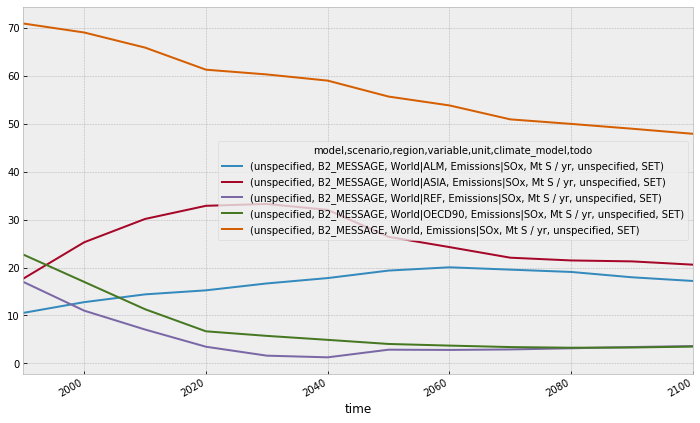

In [21]:
all_run_files["SRESB2.SCEN"].timeseries().T.groupby(
    level="variable", 
    axis=1
).plot(figsize=(12, 7.5));

## Writing files

Once you have your data in a `MAGICCData` instance, writing files is trivial. To write a file, you pass in the path you want to write the file to and the MAGICC version for which you want to write the file.

In [22]:
print(MAGICCData.write.__doc__)


        Write an input file to disk.

        For more information on file conventions, see :ref:`magicc_file_conventions`.

        Parameters
        ----------
        filepath : str
            Filepath of the file to write.

        magicc_version : int
            The MAGICC version for which we want to write files. MAGICC7 and MAGICC6
            namelists are incompatible hence we need to know which one we're writing
            for.
        


In [23]:
mdata = MAGICCData(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN", magicc_version=7)

mdata = MAGICCData(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.write("SCENEXAMPLE.SCEN", magicc_version=7)

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions, see [the docs](https://pymagicc.readthedocs.io/en/latest/file_conventions.html). Our error messaging will hopefully make this slightly clearer.

In [24]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt", magicc_version=7)

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-24-20ac4c194f29> in <module>
----> 1 mdata.write("histexample.txt", magicc_version=7)

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in write(self, filepath, magicc_version)
   2191             for.
   2192         """
-> 2193         writer = determine_tool(filepath, "writer")(magicc_version=magicc_version)
   2194         writer.write(self, filepath)
   2195 

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in determine_tool(filepath, tool_to_get)
   2338         )
   2339 
-> 2340     raise NoReaderWriterError(error_msg)
   2341 
   2342 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filepath must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
EmisIn: ^.*\_EMIS.*\.IN$
ConcIn: ^.*\_CONC